# L2: Exercise: Convolution and ReLU

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

tf.config.run_functions_eagerly(True)

Apply Transformations

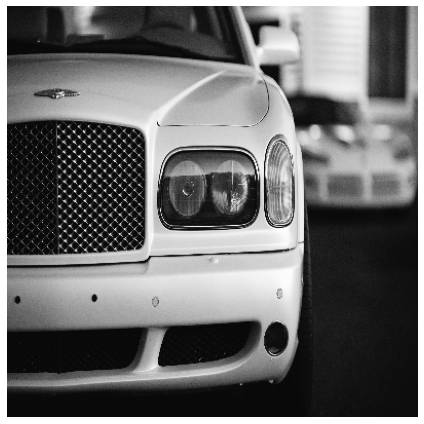

In [3]:
image_path = 'C:/Amin/Workspace/Data/Kaggle/Computer Vision/archive (1)/car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

img = tf.squeeze(image).numpy()
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show();

In [9]:
from itertools import product
def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, 
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

In [6]:
# PREDEFINED KERNELS #

# Edge detection
edge = tf.constant(
    [[-1, -1, -1],
     [-1, 8, -1],
     [-1, -1, -1]],
)

# Blur
blur = tf.constant(
    [[0.0625, 0.125, 0.0625],
     [0.125, 0.25, 0.125],
     [0.0625, 0.125, 0.0625]],
)

# Bottom sobel
bottom_sobel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)

# Emboss South-East
emboss = tf.constant(
    [[-2, -1, 0],
     [-1, 1, 1],
     [0, 1, 2]],
)

# Sharpen
sharpen = tf.constant(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]],
)


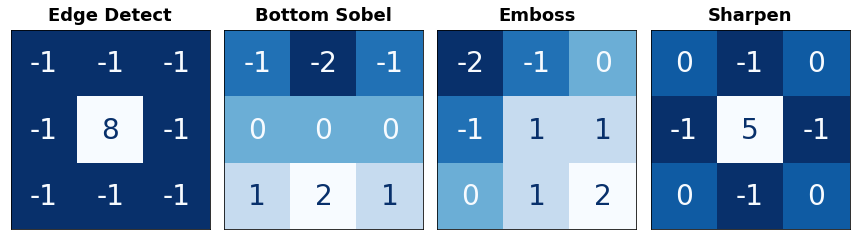

In [10]:
kernels = [edge, bottom_sobel, emboss, sharpen]
names = ["Edge Detect", "Bottom Sobel", "Emboss", "Sharpen"]

plt.figure(figsize=(12, 12))
for i, (kernel, name) in enumerate(zip(kernels, names)):
    plt.subplot(1, 4, i+1)
    show_kernel(kernel)
    plt.title(name)
plt.tight_layout()

Define Kernel

In [11]:
#Define a kernel with 3 rows and 3 columns.
kernel = tf.constant([
     [1, 1, 0],
     [1, 0, -1],
     [0, -1, -1]
])

In [12]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

2) Apply Convolution

In [13]:
conv_fn = tf.nn.conv2d

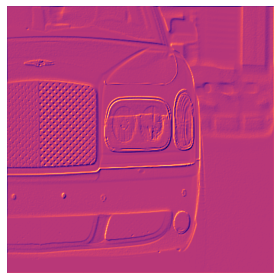

In [14]:
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=1, # or (1, 1)
    padding='SAME',
)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_filter)
)
plt.axis('off')
plt.show();

3) Apply ReLU

In [15]:
relu_fn = tf.nn.relu

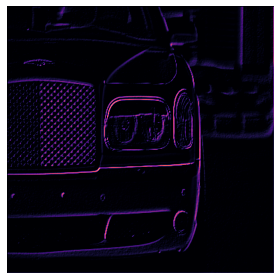

In [16]:
image_detect = relu_fn(image_filter)

plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)
plt.axis('off')
plt.show();

In [18]:
# pip install sympy

     ---------------------------------------- 6.4/6.4 MB 5.6 MB/s eta 0:00:00
     -------------------------------------- 532.6/532.6 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Sympy is a python library for symbolic mathematics. It has a nice
# pretty printer for matrices, which is all we'll use it for.
import sympy
sympy.init_printing()
from IPython.display import display

image = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])

kernel = np.array([
    [1, -1],
    [1, -1],
])

display(sympy.Matrix(image))
display(sympy.Matrix(kernel))
# Reformat for Tensorflow
image = tf.cast(image, dtype=tf.float32)
image = tf.reshape(image, [1, *image.shape, 1])
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

⎡0  1  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  1  0  1  1  1⎥
⎢                ⎥
⎣0  1  0  0  0  0⎦

⎡1  -1⎤
⎢     ⎥
⎣1  -1⎦

4) Observe Convolution on a Numerical Matrix

In [21]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='VALID',
)
image_detect = tf.nn.relu(image_filter)

# The first matrix is the image after convolution, and the second is
# the image after ReLU.
display(sympy.Matrix(tf.squeeze(image_filter).numpy()))
display(sympy.Matrix(tf.squeeze(image_detect).numpy()))

⎡-2.0  2.0   0    0  0⎤
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0   0    0  0⎥
⎢                     ⎥
⎢-2.0  2.0  -1.0  0  0⎥
⎢                     ⎥
⎣-2.0  2.0  -1.0  0  0⎦

⎡0  2.0  0  0  0⎤
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎢0  2.0  0  0  0⎥
⎢               ⎥
⎣0  2.0  0  0  0⎦

The first two operations a convolutional classifier uses for feature extraction: filtering an image with a convolution and detecting the feature with the rectified linear unit.